# BANK LOAN ANALYSIS

### IMPORT LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import openpyxl

### IMPORT RAW DATA

In [8]:
df= pd.read_excel("C:/Users/shahn/Downloads/financial_loan.xlsx")

In [9]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [10]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


## Metadata of data

In [12]:
print('No of Rows:', df.shape[0])

No of Rows: 38576


In [15]:
print('No of Column:', df.shape[1])

No of Column: 24


In [25]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

df.dtypes

In [29]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total loan application

In [34]:
total_loan_application = df['id'].count()
print("Total loan application: ",total_loan_application)

Total loan application:  38576


### Mon to Date Loan Application

In [44]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_application = mtd_data['id'].count()

print(f"MTD LOAN APPLICATION (for {latest_issue_date.strftime('%B %Y')}) : {mtd_loan_application}")



MTD LOAN APPLICATION (for December 2021) : 4314


### Total Funded Amount

In [54]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print('Total Funded Amount: ${:.2f}M'.format(total_funded_amount_millions))

Total Funded Amount: $435.76M


### MTD-Total Funded Amount

In [61]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_millions = mtd_total_funded_amount/1000000

print(f"MTD Total Funded Amount (for {latest_issue_date.strftime('%B %Y')}): ${mtd_funded_amount_millions:.2f}M")



MTD Total Funded Amount (for December 2021): $53.98M


### Total Amount received

In [62]:
total_amount_recieved = df['total_payment'].sum()
total_amount_recieved_millions = total_funded_amount/1000000
print('Total Amount Received: ${:.2f}M'.format(total_amount_recieved_millions))

Total Amount Received: $435.76M


### MTD_Total Amount received

In [63]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & 
(df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received /1000000

print(f"MTD Total Amount Received (for {latest_issue_date.strftime('%B %Y')}): ${mtd_total_amount_received_millions:.2f}M")



MTD Total Amount Received (for December 2021): $58.07M


### Average interest rate

In [67]:
avg_int_rate = df['int_rate'].mean()*100
print (f"Avg int Rate : {avg_int_rate:.2f}%")

Avg int Rate : 12.05%


### Average Debt-to-Income Ratio (DTI)

In [68]:
avg_dti = df['dti'].mean()*100
print (f"Avg dti : {avg_dti:.2f}%")

Avg dti : 13.33%


### Good Loan Metrics

In [75]:
good_loans = df[df['loan_status'].isin(['Fully Paid','Current'])]

total_loan_application = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received_amount = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount/1000000
good_loan_received_amount_millions = good_loan_received_amount/1000000

good_loan_amount_percentage = (good_loan_applications/total_loan_application)*100

print(f"Good Loan Application : {good_loan_applications}")
print(f"Good Loan Funded Amount in millions : ${good_loan_funded_amount_millions:.2f}M")
print(f"Good Loan Received Amount in millions : ${good_loan_received_amount_millions:.2f}M")
print(f"Percentage of Good Loan Application :{good_loan_amount_percentage:.2f}%")

Good Loan Application : 33243
Good Loan Funded Amount in millions : $370.22M
Good Loan Received Amount in millions : $435.79M
Percentage of Good Loan Application :86.18%


### Bad Loan Metrics

In [76]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])]

total_loan_application = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received_amount = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_received_amount_millions = bad_loan_received_amount/1000000

bad_loan_amount_percentage = (bad_loan_applications/total_loan_application)*100

print(f"bad Loan Application : {bad_loan_applications}")
print(f"bad Loan Funded Amount in millions : ${bad_loan_funded_amount_millions:.2f}M")
print(f"bad Loan Received Amount in millions : ${bad_loan_received_amount_millions:.2f}M")
print(f"Percentage of bad Loan Application :{bad_loan_amount_percentage:.2f}%")

bad Loan Application : 5333
bad Loan Funded Amount in millions : $65.53M
bad Loan Received Amount in millions : $37.28M
Percentage of bad Loan Application :13.82%


### Monthly trends by Issue Date for Total funded loan amount 

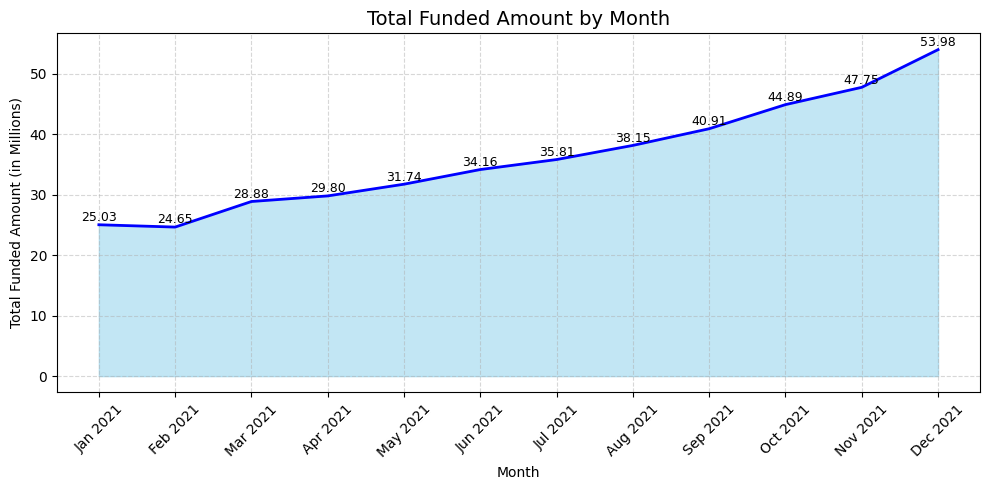

In [77]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], 
                 monthly_funded['loan_amount_millions'], 
                 color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], 
         monthly_funded['loan_amount_millions'], 
         color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, 
             f"{row['loan_amount_millions']:.2f}", 
             ha='center', va='bottom', fontsize=9, 
             rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Funded Amount (in Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Monthly trends by Issue Date for Total received loan amount 

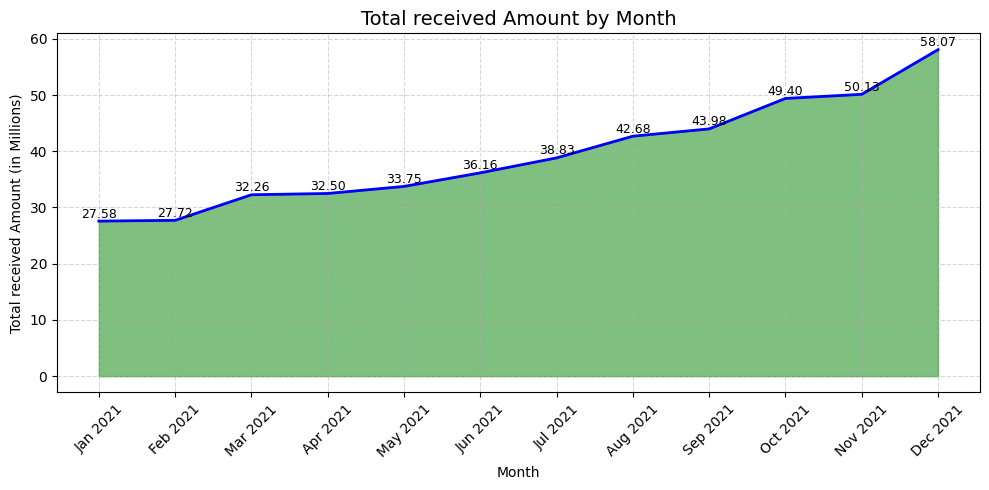

In [79]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], 
                 monthly_received['received_amount_millions'], 
                 color='green', alpha=0.5)
plt.plot(monthly_received['month_name'], 
         monthly_received['received_amount_millions'], 
         color='blue', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, 
             f"{row['received_amount_millions']:.2f}", 
             ha='center', va='bottom', fontsize=9, 
             rotation=0, color='black')

plt.title('Total received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total received Amount (in Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()